<a href="https://colab.research.google.com/github/prievarag/Time_Series_Linear_Regression_IBM/blob/main/IBM_Linear_Regression_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Using free data: IBM Daily Adjusted Stock Time Series from Alpha Vantage

In [ ]:
# Description: predicting future price of IBM stock

In [12]:
# Importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
plt.style.use('fivethirtyeight')

In [2]:
# Import the data
from google.colab import files
files.upload()

Saving daily_adjusted_IBM.csv to daily_adjusted_IBM.csv


{'daily_adjusted_IBM.csv': b'timestamp,open,high,low,close,adjusted_close,volume,dividend_amount,split_coefficient\r\n2021.12.30,133.75,134.37,133.33,133.91,133.91,3158111,0,1\r\n2021.12.29,132.4,134.21,132.3,133.35,133.35,4239935,0,1\r\n2021.12.28,131.6,133.22,131.59,132.63,132.63,3447079,0,1\r\n2021.12.27,130.63,131.65,129.95,131.62,131.62,4294499,0,1\r\n2021.12.23,130,130.96,129.52,130.63,130.63,3649044,0,1\r\n2021.12.22,129.06,129.79,127.6,129.75,129.75,3923198,0,1\r\n2021.12.21,127.66,129.3356,127.66,128.97,128.97,4855972,0,1\r\n2021.12.20,125.72,127.2,124.7,127.06,127.06,4941411,0,1\r\n2021.12.17,125.87,128.64,125.2093,127.4,127.4,10382693,0,1\r\n2021.12.16,123.51,126.6399,123.475,125.93,125.93,7280537,0,1\r\n2021.12.15,123.8,124.815,122.18,123.11,123.11,4990028,0,1\r\n2021.12.14,122.35,125.03,122.3,123.76,123.76,5716124,0,1\r\n2021.12.13,123.76,124.3554,120.79,122.58,122.58,6847468,0,1\r\n2021.12.10,124.3,125.33,123.36,124.09,124.09,4966921,0,1\r\n2021.12.09,122.15,123.95,121.79

In [5]:
# Store the data
df = pd.read_csv("daily_adjusted_IBM.csv", index_col="timestamp", parse_dates=["timestamp"])

In [6]:
df

,open,high,low,close,adjusted_close,volume,dividend_amount,split_coefficient
timestamp,,,,,,,,
2021-12-30,133.75,134.3700,133.3300,133.91,133.910000,3158111,0.0,1.0
2021-12-29,132.40,134.2100,132.3000,133.35,133.350000,4239935,0.0,1.0
2021-12-28,131.60,133.2200,131.5900,132.63,132.630000,3447079,0.0,1.0
2021-12-27,130.63,131.6500,129.9500,131.62,131.620000,4294499,0.0,1.0
2021-12-23,130.00,130.9600,129.5200,130.63,130.630000,3649044,0.0,1.0
...,...,...,...,...,...,...,...,...
2021-08-16,143.23,143.7400,142.2300,143.59,135.437376,2786343,0.0,1.0
2021-08-13,142.64,143.5800,142.4400,143.18,135.050655,1908951,0.0,1.0
2021-08-12,142.26,143.1500,142.0766,143.07,134.946900,2089418,0.0,1.0


In [9]:
# Reverse the order of the datafram (because of the timestamp is in reversed order)
df1 = df.iloc[::-1]

In [10]:
df1

,open,high,low,close,adjusted_close,volume,dividend_amount,split_coefficient
timestamp,,,,,,,,
2021-08-10,141.21,141.8110,140.3400,141.38,133.352853,5299869,0.0,1.0
2021-08-11,141.78,142.7685,141.5000,142.13,134.060271,4259952,0.0,1.0
2021-08-12,142.26,143.1500,142.0766,143.07,134.946900,2089418,0.0,1.0
2021-08-13,142.64,143.5800,142.4400,143.18,135.050655,1908951,0.0,1.0
2021-08-16,143.23,143.7400,142.2300,143.59,135.437376,2786343,0.0,1.0
...,...,...,...,...,...,...,...,...
2021-12-23,130.00,130.9600,129.5200,130.63,130.630000,3649044,0.0,1.0
2021-12-27,130.63,131.6500,129.9500,131.62,131.620000,4294499,0.0,1.0
2021-12-28,131.60,133.2200,131.5900,132.63,132.630000,3447079,0.0,1.0


In [11]:
# Creating time-stap features
# Time-step features are features we can derive directly from the time index. 
# The most basic time-step feature is the time dummy, 
# which counts off time steps in the series from beginning to end.
df['Time'] = np.arange(len(df.index))
df.head()

,open,high,low,close,adjusted_close,volume,dividend_amount,split_coefficient,Time
timestamp,,,,,,,,,
2021-12-30,133.75,134.37,133.33,133.91,133.91,3158111,0.0,1.0,0
2021-12-29,132.40,134.21,132.30,133.35,133.35,4239935,0.0,1.0,1
2021-12-28,131.60,133.22,131.59,132.63,132.63,3447079,0.0,1.0,2
2021-12-27,130.63,131.65,129.95,131.62,131.62,4294499,0.0,1.0,3
2021-12-23,130.00,130.96,129.52,130.63,130.63,3649044,0.0,1.0,4


Text(0.5, 1.0, 'Time Plot of IBM Stock Close Price')

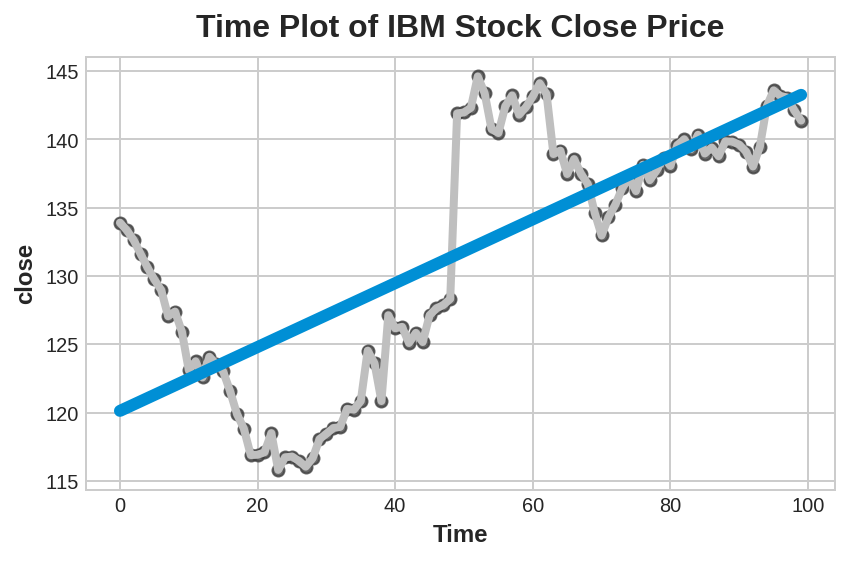

In [14]:
# Plot the Linear Regression line and the close value
plt.style.use("seaborn-whitegrid")
plt.rc(
    "figure",
    autolayout=True,
    figsize=(11, 4),
    titlesize=18,
    titleweight='bold',
)
plt.rc(
    "axes",
    labelweight="bold",
    labelsize="large",
    titleweight="bold",
    titlesize=16,
    titlepad=10,
)
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

fig, ax = plt.subplots()
ax.plot('Time', 'close', data=df, color='0.75')
ax = sns.regplot(x='Time', y='close', data=df, ci=None, scatter_kws=dict(color='0.25'))
ax.set_title('Time Plot of IBM Stock Close Price')